Proposed expansion to [natural_pdf](https://github.com/jsoma/natural-pdf) to identify tables by page elements or regular expressions. More effective in certain cases than methods reliant on OCR or page structure.

# Quickstart

Navigate to your project directory and clone this repository:

git clone https://github.com/declanrjb/naturalpdf-table-delim

Import the module in a new Python script or the interpreter:

In [1]:
import tabledelim as td

For testing, you may also need to load the base natural_pdf library. (This project is in development. The goal is to incorporate these methods into natural_pdf itself.)

In [2]:
import natural_pdf
from natural_pdf import PDF

# Structure

The table_delim approach to table scraping thinks of tables as structures of certain elements or patterns. Anything can be a table: not just grids of lines. The method excepts a set of elements (or specifier) that delineate rows and a set of elements (or specifier) delineate columns. The relevant regions are then calculated as the space between those elements.

Eg: Elements reading "AMERICAN AIRLINES" and "ALLEGIANT AIR" are passed as row delimiters. The first row is then a region the width of the passed bounding box with top equal to the top attribute of AMERICAN AIRLINES and bottom equal to the top attribute of ALLEGIANT AIR. Columns are calculated similarly with respect to the left and right attributes.

# Worked Examples

## Election Precinct Scraping

The inspiration for this method, which has proven able to handle precinct PDFs without rigorous visual table structure.

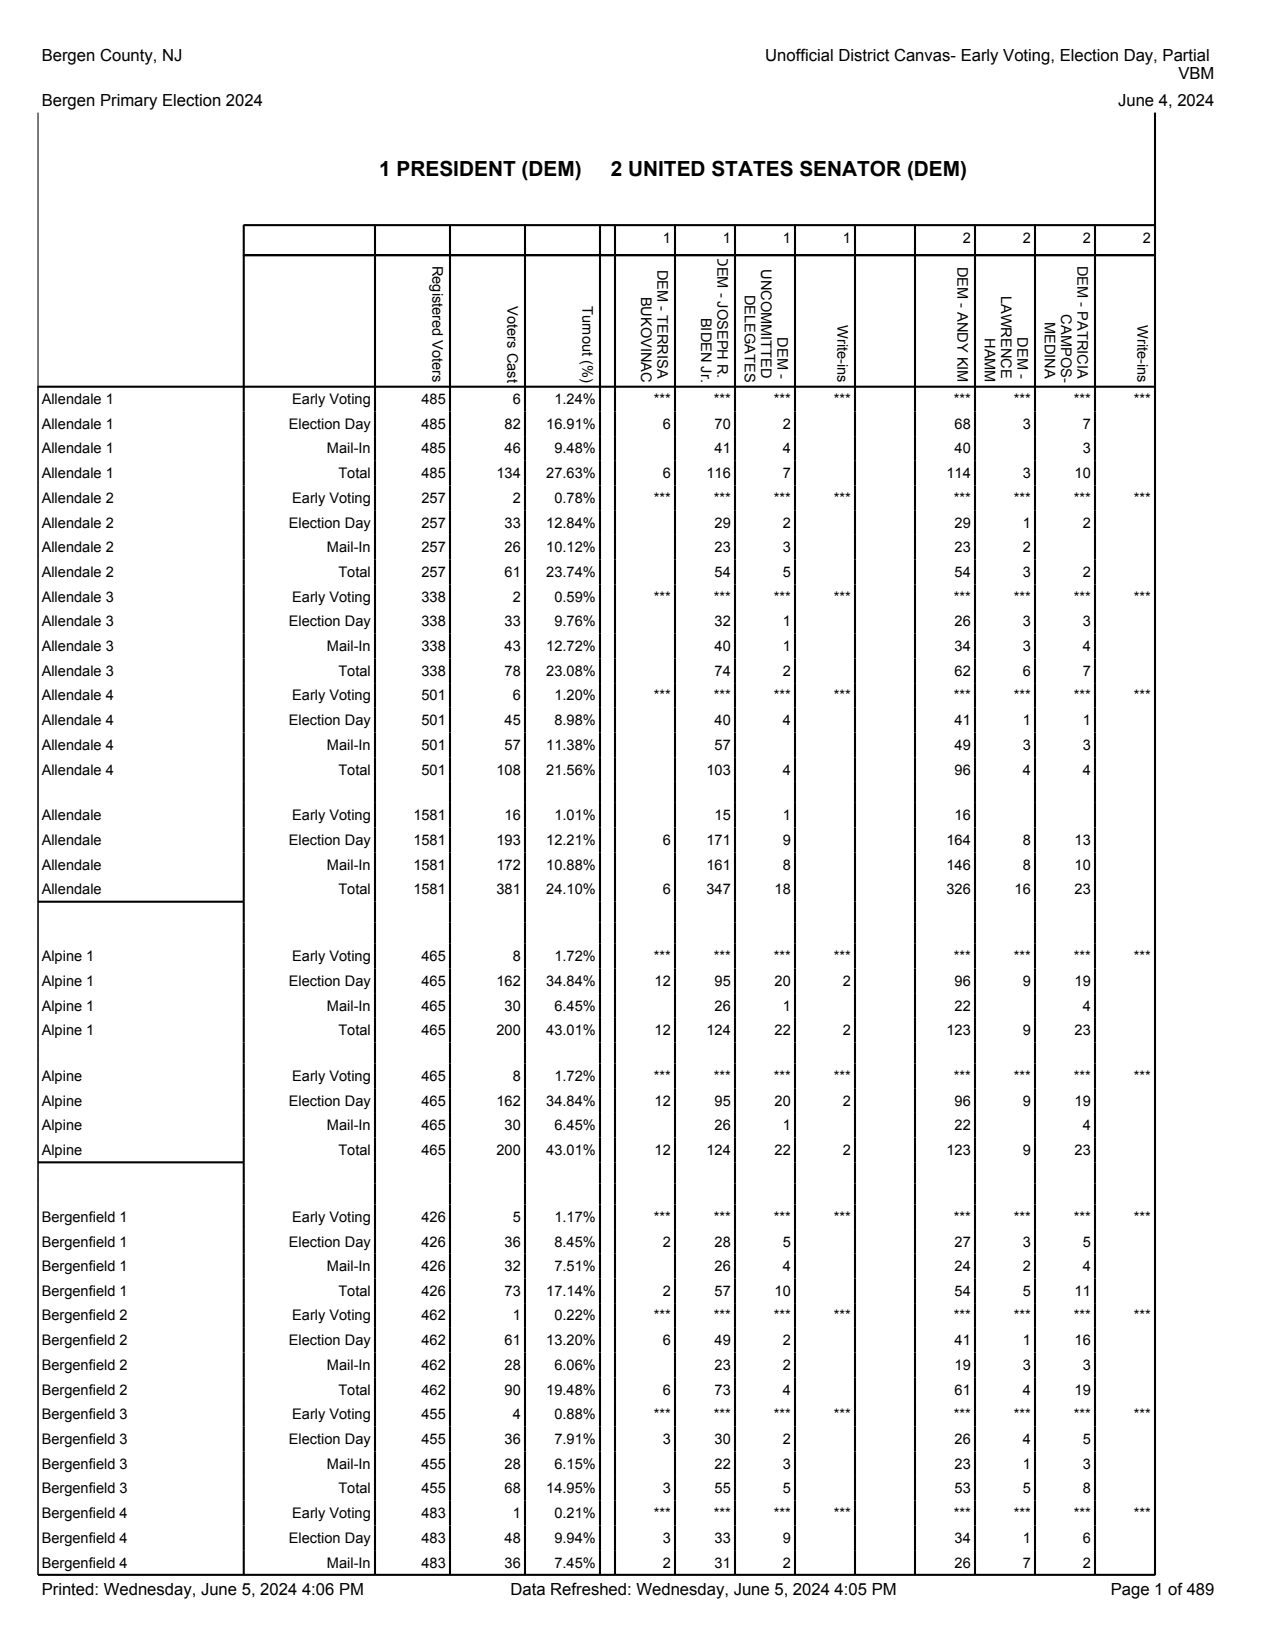

In [3]:
pdf = PDF('demo/bergin_precincts.pdf')
page = pdf.pages[0]
page.show()

In [7]:
td.table_delim(page, 
    rows = 'text:regex("[a-zA-Z]+\s[0-9]{0,1}$")', # text with at least one word folowed by a space followed by 0 or 1 numbers
    cols = 'line:vertical', # vertical lines of height at least 20
    bbox = {
        'top': page.find('text:contains("Allendale 1")').top # only apply this scrape to the part of the page below the first appearance of PRESIDENT
    })

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Allendale 1,Early Voting,485,6,1.24%,,***,***,***,***,,***,***,***,
1,Allendale 1,Election Day,485,82,16.91%,,6,70,2,,,68,3,7,
2,Allendale 1,Mail-In,485,46,9.48%,,,41,4,,,40,,3,
3,Allendale 1,Total,485,134,27.63%,,6,116,7,,,114,3,10,
4,Allendale 2,Early Voting,257,2,0.78%,,***,***,***,***,,***,***,***,
5,Allendale 2,Election Day,257,33,12.84%,,,29,2,,,29,1,2,
6,Allendale 2,Mail-In,257,26,10.12%,,,23,3,,,23,2,,
7,Allendale 2,Total,257,61,23.74%,,,54,5,,,54,3,2,
8,Allendale 3,Early Voting,338,2,0.59%,,***,***,***,***,,***,***,***,
9,Allendale 3,Election Day,338,33,9.76%,,,32,1,,,26,3,3,


Compared to an attempt to scrape the same page using base natural_pdf:

In [36]:
pd.DataFrame(page.extract_table())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,None,,,,,,1,1,1,1,,2,2,2,2
1,None,,Registered\nVoters,Voters\nCast,Turnout\n(%),,DEM\nBUKOVINAC\n-\nTERRISA,DEM\n-\nJOSEPH\nBIDEN\nJr. R.,UNCOMMITTED\nDELEGATES\nDEM\n-,Write-ins,,DEM\n-\nANDY\nKIM,LAWRENCE\nHAMM DEM\n-,DEM\n-\nCAMPOS- PATRICIA\nMEDINA,Write-ins
2,Allendale 1\nAllendale 1\nAllendale 1\nAllenda...,Early Voting\nElection Day\nMail-In\nTotal\nEa...,485\n485\n485\n485\n257\n257\n257\n257\n338\n3...,6\n82\n46\n134\n2\n33\n26\n61\n2\n33\n43\n78\n...,1.24%\n16.91%\n9.48%\n27.63%\n0.78%\n12.84%\n1...,,***\n6\n6\n***\n***\n***\n6\n6\n***\n12\n12\n*...,***\n70\n41\n116\n***\n29\n23\n54\n***\n32\n40...,***\n2\n4\n7\n***\n2\n3\n5\n***\n1\n1\n2\n***\...,***\n***\n***\n***\n***\n2\n2\n***\n2\n2\n***\...,,***\n68\n40\n114\n***\n29\n23\n54\n***\n26\n34...,***\n3\n3\n***\n1\n2\n3\n***\n3\n3\n6\n***\n1\...,***\n7\n3\n10\n***\n2\n2\n***\n3\n4\n7\n***\n1...,***\n***\n***\n***\n***\n***\n***\n***\n***\n***
3,Alpine 1\nAlpine 1\nAlpine 1\nAlpine 1\nAlpine...,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Bergenfield 1\nBergenfield 1\nBergenfield 1\nB...,None,None,None,None,None,None,None,None,None,None,None,None,None,None


## Use of Force in Vancouver

Example from jsoma's [collection of bad pdfs](https://badpdfs.com/pdfs/use-of-force-raw/).

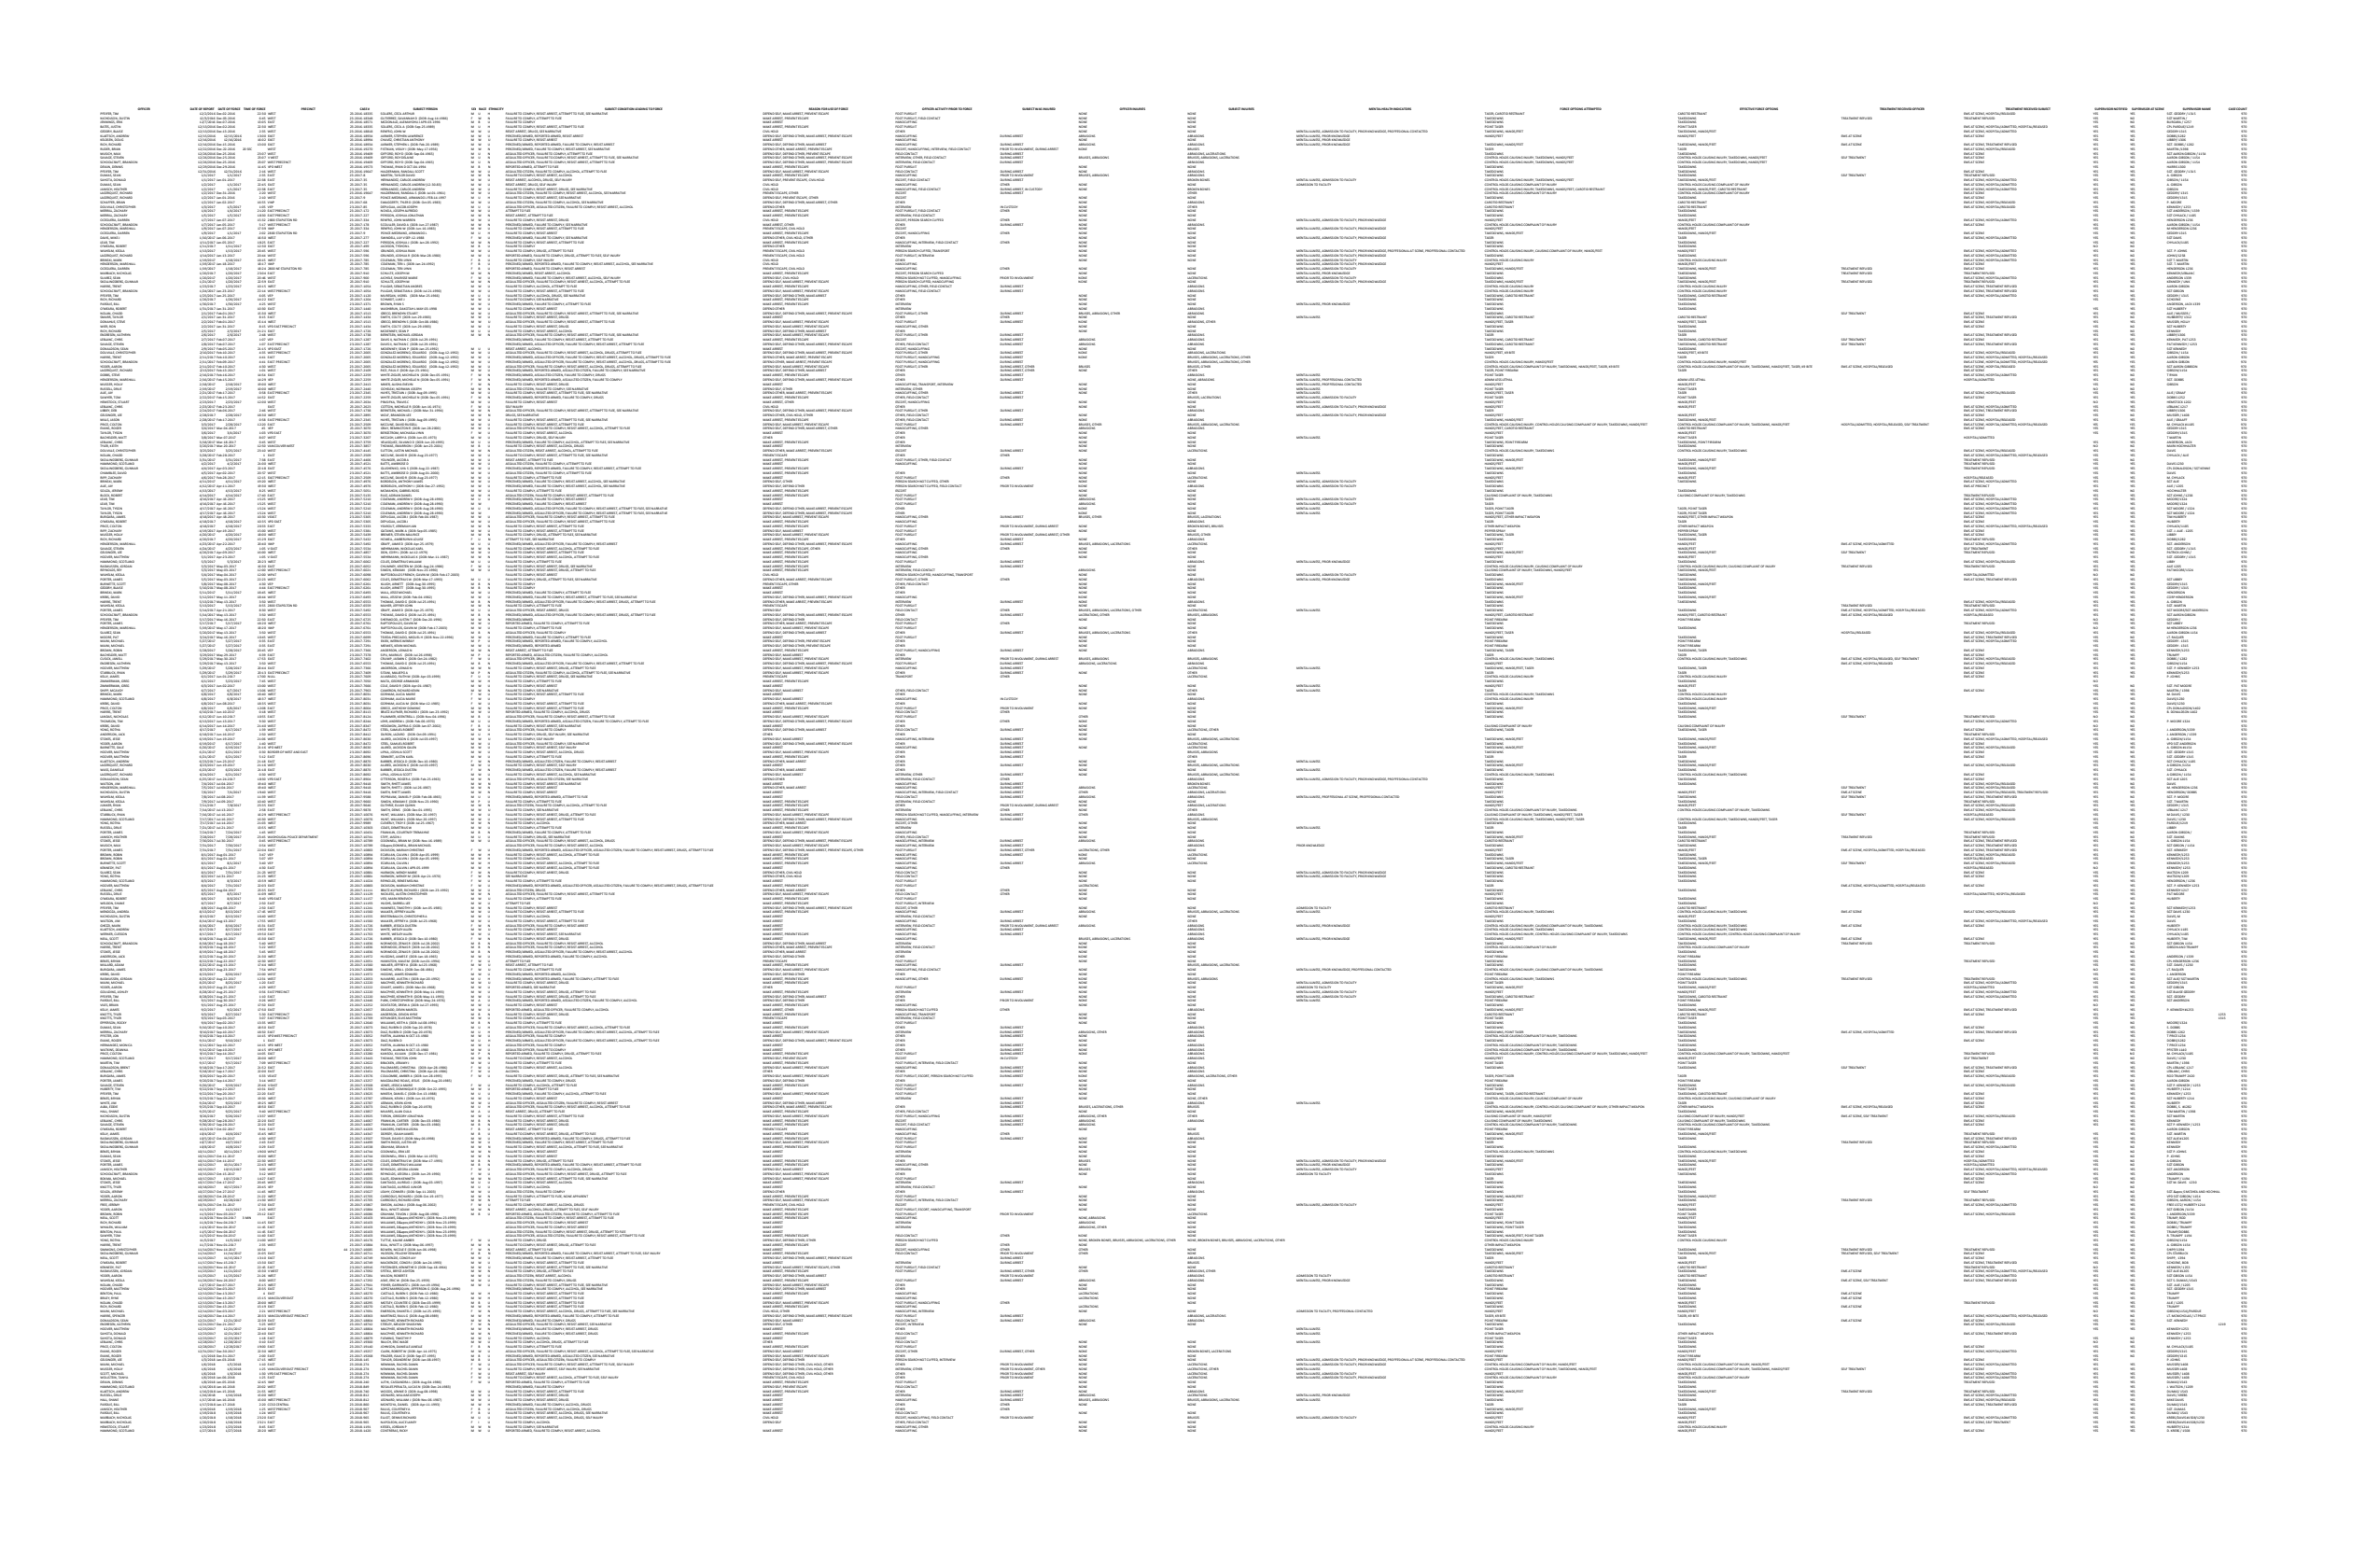

In [38]:
force_doc = PDF('demo/use-of-force-raw.pdf')
page = force_doc.pages[0]
page.show()

In [39]:
td.table_delim(page, rows='text:contains("970")', cols=td.slice_fitting_elem(page, 'text:contains("PFEIFER, TIM")').find_all('text'))

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,"PFEIFER, TIM",12/2/2016,Dec-02-2016,22:30,WEST,23-2016-18335,"SOLLERS, CECIL ARTHUR",M,U,H,...,FOOT PURSUIT,NONE,NONE,"TASER, CAROTID RESTRAINT",CAROTID RESTRAINT,"EMS AT SCENE, HOSPITAL/RELEASED",YES,YES,SGT. GEDDRY / 1315,970
1,"NICHOLSON, DUSTIN",12/3/2016,Dec-03-2016,6:45,WEST,23-2016-18348,"GUTIERREZ, SAVANNAH D (DOB: Aug-14-1986)",F,W,N,...,"FOOT PURSUIT, FIELD CONTACT",NONE,NONE,TAKEDOWNS,TAKEDOWNS TREATMENT REFUSED,TREATMENT REFUSED,YES,NO,SGT MARTIN /,970
2,"JENNINGS, ERIK",12/7/2016,Dec-07-2016,13:05,EAST,23-2016-18571,"MCDONALD, ALEMAYOHU J APR-03-1996",M,B,U,...,HANDCUFFING,NONE,NONE,TAKEDOWNS,TAKEDOWNS,,YES,NO,BURGARA / 1257,970
3,"BATES, JUSTIN",12/13/2016,Dec-02-2016,22:30,WEST,23-2016-18335,"SOLLERS, CECIL A (DOB: Sep-25-1989)",M,U,H,...,FOOT PURSUIT,NONE,NONE,POINT TASER,POINT TASER,"EMS AT SCENE, HOSPITAL/ADMITTED, HOSPITAL/RELE...",YES,YES,CPL PARDUE/1219,970
4,"GEDDRY, BLAISE",12/13/2016,Dec-13-2016,2:35,WEST,23-2016-18818,"RENFRO, JOHN W",M,W,U,...,OTHER,NONE,"NONE MENTAL ILLNESS, ADMISSION TO FACILITY, PR...","TAKEDOWNS, HANDS/FEET","TAKEDOWNS, HANDS/FEET","EMS AT SCENE, HOSPITAL/ADMITTED",YES,YES,GEDDRY 1315,970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,"PARDUE, BILL",1/19/2018,1/19/2018,1:24,WEST,23-2018-967,"RAULS, COURTNEY A",F,B,U,...,FIELD CONTACT,NONE,NONE,TAKEDOWNS,TAKEDOWNS,,YES,YES,DUMAS/ 1543,970
297,"MARBACH, NICHOLAS",1/20/2018,1/18/2018,23:20,EAST,23-2018-965,"ELLIOT, DENNIS RICHARD",M,U,U,...,"ESCORT, HANDCUFFING, FIELD CONTACT PRIOR TO IN...",,"BRUISES MENTAL ILLNESS, ADMISSION TO FACILITY",HANDS/FEET,HANDS/FEET,"EMS AT SCENE, HOSPITAL/ADMITTED",YES,YES,KREBS/DAVIS #1508/1230,970
298,"MARBACH, NICHOLAS",1/20/2018,1/18/2018,23:21,EAST,23-2018-965,"NAPOLEON, ALICE LANEY",F,I,U,...,"OTHER, FIELD CONTACT",NONE,NONE,HANDS/FEET,HANDS/FEET,"EMS AT SCENE, SELF TREATMENT",YES,YES,KREBS/DAVIS #1508/1230,970
299,"HEMSTOCK, STUART",1/23/2018,1/23/2018,8:45,EAST,23-2018-1191,"KESSEL, JORDAN P",M,W,N,...,"HANDCUFFING, OTHER",NONE,NONE,CONTROL HOLDS CAUSING INJURY,CONTROL HOLDS CAUSING INJURY,,YES,YES,HUBERTY/1214,970
